In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import backtrader as bt
import datetime

In [9]:
plt.style.use('seaborn-v0_8')

In [8]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [14]:
## MOMENTUM
# if close[2] > close[1], then buy
# if close[2] < close[1], then sell

class Momentum(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.dataclose[-2] > self.dataclose[-1]:
            self.order = self.buy()
            print(f'buy executed @ {self.dataclose[0]}')
        if self.dataclose[-2] < self.dataclose[-1]:
            self.order = self.sell()
            print(f'sell executed @ {self.dataclose[0]}')
        else:
            self.order = self.close
            print(f'closing @ {self.dataclose[0]}')

cerebro = bt.Cerebro()
cerebro.addstrategy(Momentum)

0

In [15]:
import yfinance as yf
tesla = yf.download('TSLA', start='2020-01-01')
tesla_parsed_data = bt.feeds.PandasData(dataname=tesla)
cerebro.adddata(tesla_parsed_data)
cerebro.run()

[*********************100%%**********************]  1 of 1 completed


sell executed @ 28.68400001525879
buy executed @ 29.534000396728516
closing @ 29.534000396728516
sell executed @ 30.1026668548584
sell executed @ 31.270666122436523
sell executed @ 32.80933380126953
sell executed @ 32.089332580566406
buy executed @ 31.876667022705078
closing @ 31.876667022705078
buy executed @ 34.990665435791016
closing @ 34.990665435791016
sell executed @ 35.861331939697266
sell executed @ 34.56666564941406
buy executed @ 34.232666015625
closing @ 34.232666015625
buy executed @ 34.03333282470703
closing @ 34.03333282470703
buy executed @ 36.47999954223633
closing @ 36.47999954223633
sell executed @ 37.97066879272461
sell executed @ 38.14666748046875
sell executed @ 37.654666900634766
buy executed @ 37.201332092285156
closing @ 37.201332092285156
buy executed @ 37.793331146240234
closing @ 37.793331146240234
sell executed @ 38.732666015625
sell executed @ 42.72066879272461
sell executed @ 43.371334075927734
sell executed @ 52.0
sell executed @ 59.137332916259766
sell e

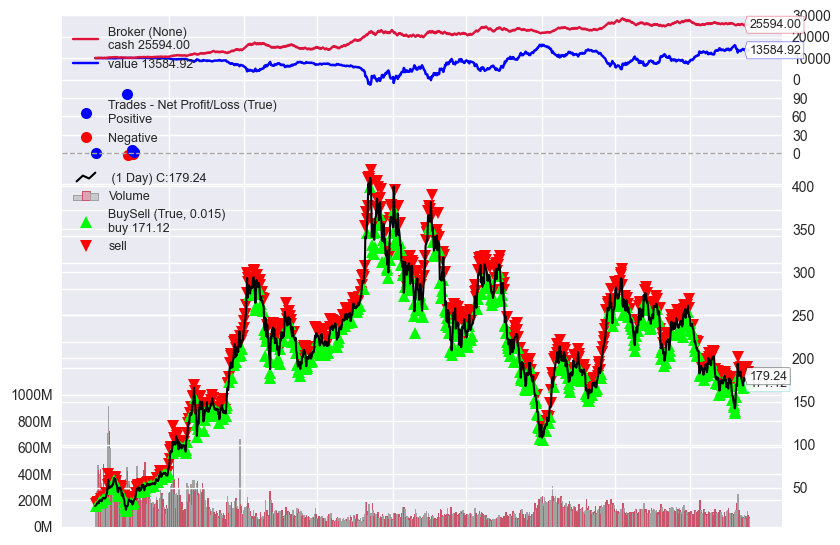

[[<Figure size 800x550 with 4 Axes>]]

In [23]:
%matplotlib inline
cerebro.plot(iplot=False, volume=True)

In [ ]:
df = pd.read_csv('eur_hourly.csv', parse_dates=True, index_col='Timestamp')
df['return'] = np.log(df.price / df.price.shift(1))
df['return'].groupby(df.index.hour).mean().plot(kind='bar')

![alt text](image-5.png)

In [18]:
class HourlyBias(bt.Strategy):
    def __init(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.dataclose[0].datetime.hour == 9:
            self.order = self.sell()
            print(f'sell executed @ {self.dataclose[0]}')
        if self.dataclose[0].datetime.hour == 12:
            self.order = self.buy()
            print(f'buy executed @ {self.dataclose[0]}')

In [ ]:
data = bt.feeds.PandasData(dataname=df, open=0, high=0, low=0, close=0, volume=-1, openinterest=-1)
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(HourlyBias)
cerebro.run()

In [ ]:
%matplotlib inline
cerebro.plot(iplot=False, volume=False)